In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
df = pd.read_csv('correct.csv')

In [144]:
df.info()
df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 3 columns):
Year            58 non-null int64
Gold_price      58 non-null int64
Silver_Price    42 non-null float64
dtypes: float64(1), int64(2)
memory usage: 1.4 KB


In [145]:
X1 = df['Year']
X2 = df['Gold_price']
y = df['Silver_Price']

In [146]:
# X1 = np.array(X1)
# X2 = np.array(X2)
# y = np.array(y)
n = len(df)

In [147]:
X12 = np.sum(X1**2) - (np.sum(X1)**2)/n
X22 = np.sum(X2**2) - (np.sum(X2)**2)/n
X1Y = np.sum(X1*y) - (np.sum(X1) * np.sum(y))/n
X2Y = np.sum(X2*y) - (np.sum(X2) * np.sum(y))/n
X1X2= np.sum(X1*X2) - (np.sum(X1)*np.sum(X2))/n


print("",X12,"\n",X22,"\n",X1Y,"\n",X2Y,"\n", X1X2)

 6170.5 
 8977801148.571428 
 8569255.5 
 11464211292.285715 
 6467312.0


In [148]:
B1 = (((X22) * (X1Y)) - ((X1X2) * (X2Y)))/((X12 * X22) - (X1X2 **2))
B2 = (((X12) * (X2Y)) - ((X1X2) * (X1Y)))/((X12 * X22) - (X1X2 **2))
B0 = df['Silver_Price'].mean() - B1*df['Year'].mean() - B2*df['Gold_price'].mean()


In [149]:
print(B1)

205.61188432402818


In [150]:
print(B2)

1.1288348803612045


In [151]:
print(B0)

-406636.42608834914


In [152]:
df['predicted_Silver_price'] = B0 + (B1 * df['Year']) + (B2 * df['Gold_price'])
df['error'] = (df['predicted_Silver_price'] - df['Silver_Price']).abs()

In [153]:
mse = (1 / n) * ((df['predicted_Silver_price'] - df['Silver_Price']) ** 2).sum()
rmse = np.sqrt(mse)


In [154]:
print("Coefficients:")
print("B0:", B0)
print("B1:", B1)
print("B2:", B2)
print("MSE: ",mse)
print("RMSE:", rmse)


Coefficients:
B0: -406636.42608834914
B1: 205.61188432402818
B2: 1.1288348803612045
MSE:  27970705.328672204
RMSE: 5288.7338114781505


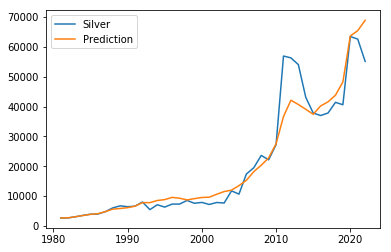

In [155]:
# print("Silver price for 2024 = ",predict_silver(2024, predict_gold(2024)/10))

plt.figure()
plt.plot(df['Year'], df['Silver_Price'] , label = "Silver")
plt.plot(df['Year'], df['predicted_Silver_price'], label = "Prediction")
plt.legend()
plt.show()

In [169]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [170]:
lr = LinearRegression()

In [171]:
X = df[['Year', 'Gold_price']]
y = df['Silver_Price']

In [172]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [173]:
pred = lr.predict(X)

In [174]:
mse_skl = mean_squared_error(y, pred)
rmse_skl = mse_skl**0.5
B0_skl = lr.intercept_
B1_B2 = lr.coef_

print(f'B0_skl: {B0_skl}')
print(f'B1_skl: {B1_B2}')
print(f'MSE_skl: {mse_skl}')
print(f'RMSE_skl: {rmse_skl}')



B0_skl: -406636.4260883493
B1_skl: [205.61188432   1.12883488]
MSE_skl: 27970705.328672215
RMSE_skl: 5288.733811478151
